In [1]:
# Load the necessary libraries 
import datetime 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Loading the Amsterdam Zuid dataset (need to be changed when using the other csv set)
df_kadaster = pd.read_csv('final-amsterdamzuid.csv', index_col = False) 
df_kadaster

Unnamed: 0     openbareruimtenaam  huisnummer huisletter  \
0          329595  Cornelis Schuytstraat          74        NaN   
1          329626      J.J. Viottastraat          41        NaN   
2          329627      J.J. Viottastraat          43        NaN   
3          329628      J.J. Viottastraat          47        NaN   
4          329629      J.J. Viottastraat          49        NaN   
...           ...                    ...         ...        ...   
17891     9513313  Willem Royaardsstraat          18          F   
17892     9513314  Willem Royaardsstraat          18          G   
17893     9518655              Zuidplein           5        NaN   
17894     9518657              Zuidplein          26        NaN   
17895     9518658              Zuidplein          42        NaN   

      huisnummertoevoeging postcode         buurtnaam   buurtcode  \
0                      NaN   1071JL     Banpleinbuurt  BU03634704   
1                      NaN   1071JP     Banpleinbuurt  BU03634704   
2                      NaN   1071JP     Banpleinbuurt  BU03634704   
3                      NaN   1071JP     Banpleinbuurt  BU03634704   
4                      NaN   1071JP     Banpleinbuurt  BU03634704   
...                    ...      ...               ...         ...   
17891                  NaN      NaN  Diepenbrockbuurt  BU03634900   
17892                  NaN      NaN  Diepenbrockbuurt  BU03634900   
17893                  NaN      NaN      Zuidas Noord  BU03632300   
17894                  NaN      NaN      Zuidas Noord  BU03632300   
17895                  NaN      NaN      Zuidas Noord  BU03632300   

             wijknaam  wijkcode  ... aantal_pand_relaties_dit_vbo  \
0      Museumkwartier  WK036347  ...                          1.0   
1      Museumkwartier  WK036347  ...                          1.0   
2      Museumkwartier  WK036347  ...                          1.0   
3      Museumkwartier  WK036347  ...                          1.0   
4      Museumkwartier  WK036347  ...                          1.0   
...               ...       ...  ...                          ...   
17891     Apollobuurt  WK036349  ...                          1.0   
17892     Apollobuurt  WK036349  ...                          1.0   
17893          Zuidas  WK036323  ...                          1.0   
17894          Zuidas  WK036323  ...                          1.0   
17895          Zuidas  WK036323  ...                          1.0   

            pand_id  aantal_vbo_relaties_dit_pnd vbo_pnd_1_op_1 opp_pand  \
0      3.631000e+14                          1.0            1.0    241.0   
1      3.631000e+14                          1.0            1.0      8.0   
2      3.631000e+14                          1.0            1.0    328.0   
3      3.631000e+14                          2.0            0.0    273.0   
4      3.631000e+14                          2.0            0.0    273.0   
...             ...                          ...            ...      ...   
17891  3.631000e+14                          1.0            1.0     19.0   
17892  3.631000e+14                          1.0            1.0     19.0   
17893  3.631000e+14                          1.0            1.0     53.0   
17894  3.631000e+14                         60.0            0.0   4831.0   
17895  3.631000e+14                         60.0            0.0   4831.0   

               woningtype  omtrek_pand  verhouding_opp_vbo_opp_pnd  \
0                     NaN         70.0                        3.20   
1                     NaN         11.0                        0.63   
2                     NaN         86.0                        3.07   
3                     NaN         72.0                        2.77   
4      Vrijstaande woning         72.0                        2.77   
...                   ...          ...                         ...   
17891                 NaN         19.0                        0.95   
17892                 NaN         19.0                        0.95   
1

In [3]:
df_kadaster['potent_pand_asbest'] = ((df_kadaster['bouwjaar'] >= 1955) & (df_kadaster['bouwjaar'] <= 1978))
df_kadaster['potent_pand_asbest'] = list(map(int, df_kadaster['potent_pand_asbest']))

# 1 = potential cases of asbest and 0 = no asbest
print(df_kadaster['potent_pand_asbest'].value_counts())

0    16934
1      962
Name: potent_pand_asbest, dtype: int64


In [4]:
df_kadaster.dtypes

Unnamed: 0                        int64
openbareruimtenaam               object
huisnummer                        int64
huisletter                       object
huisnummertoevoeging             object
postcode                         object
buurtnaam                        object
buurtcode                        object
wijknaam                         object
wijkcode                         object
woonplaats                       object
gemeentecode                      int64
nevenadres                        int64
typeadresseerbaarobject          object
adresseerbaarobject_status       object
opp_adresseerbaarobject_m2        int64
aantal_nad_per_adresobject        int64
adresseerbaarobject_id            int64
x                               float64
y                               float64
lon                             float64
lat                             float64
woonfunctie                     float64
bijeenkomstfunctie              float64
celfunctie                      float64


According to the research by Xin and Huan (2013, https://www.sciencedirect.com/science/article/pii/S0379711213001653), most fire occurences from 2007 to 2010 within China happened in "Residential buildings" (complete top 3 is also "Industry buildings" and "Public buildings", see table 3 of the linked paper). So the probability of fire is higher at residential buildings in comparison to the other two types. 

In [5]:
BBox = ((df_kadaster.lon.min(),   df_kadaster.lon.max(),      
         df_kadaster.lat.min(), df_kadaster.lat.max()))
BBox

(4.86803003, 4.89775794, 52.33965358, 52.35284172)

In [6]:
# Map made by https://www.openstreetmap.org/export#map=13/52.3373/4.8528
ams_z = plt.imread('map.png')

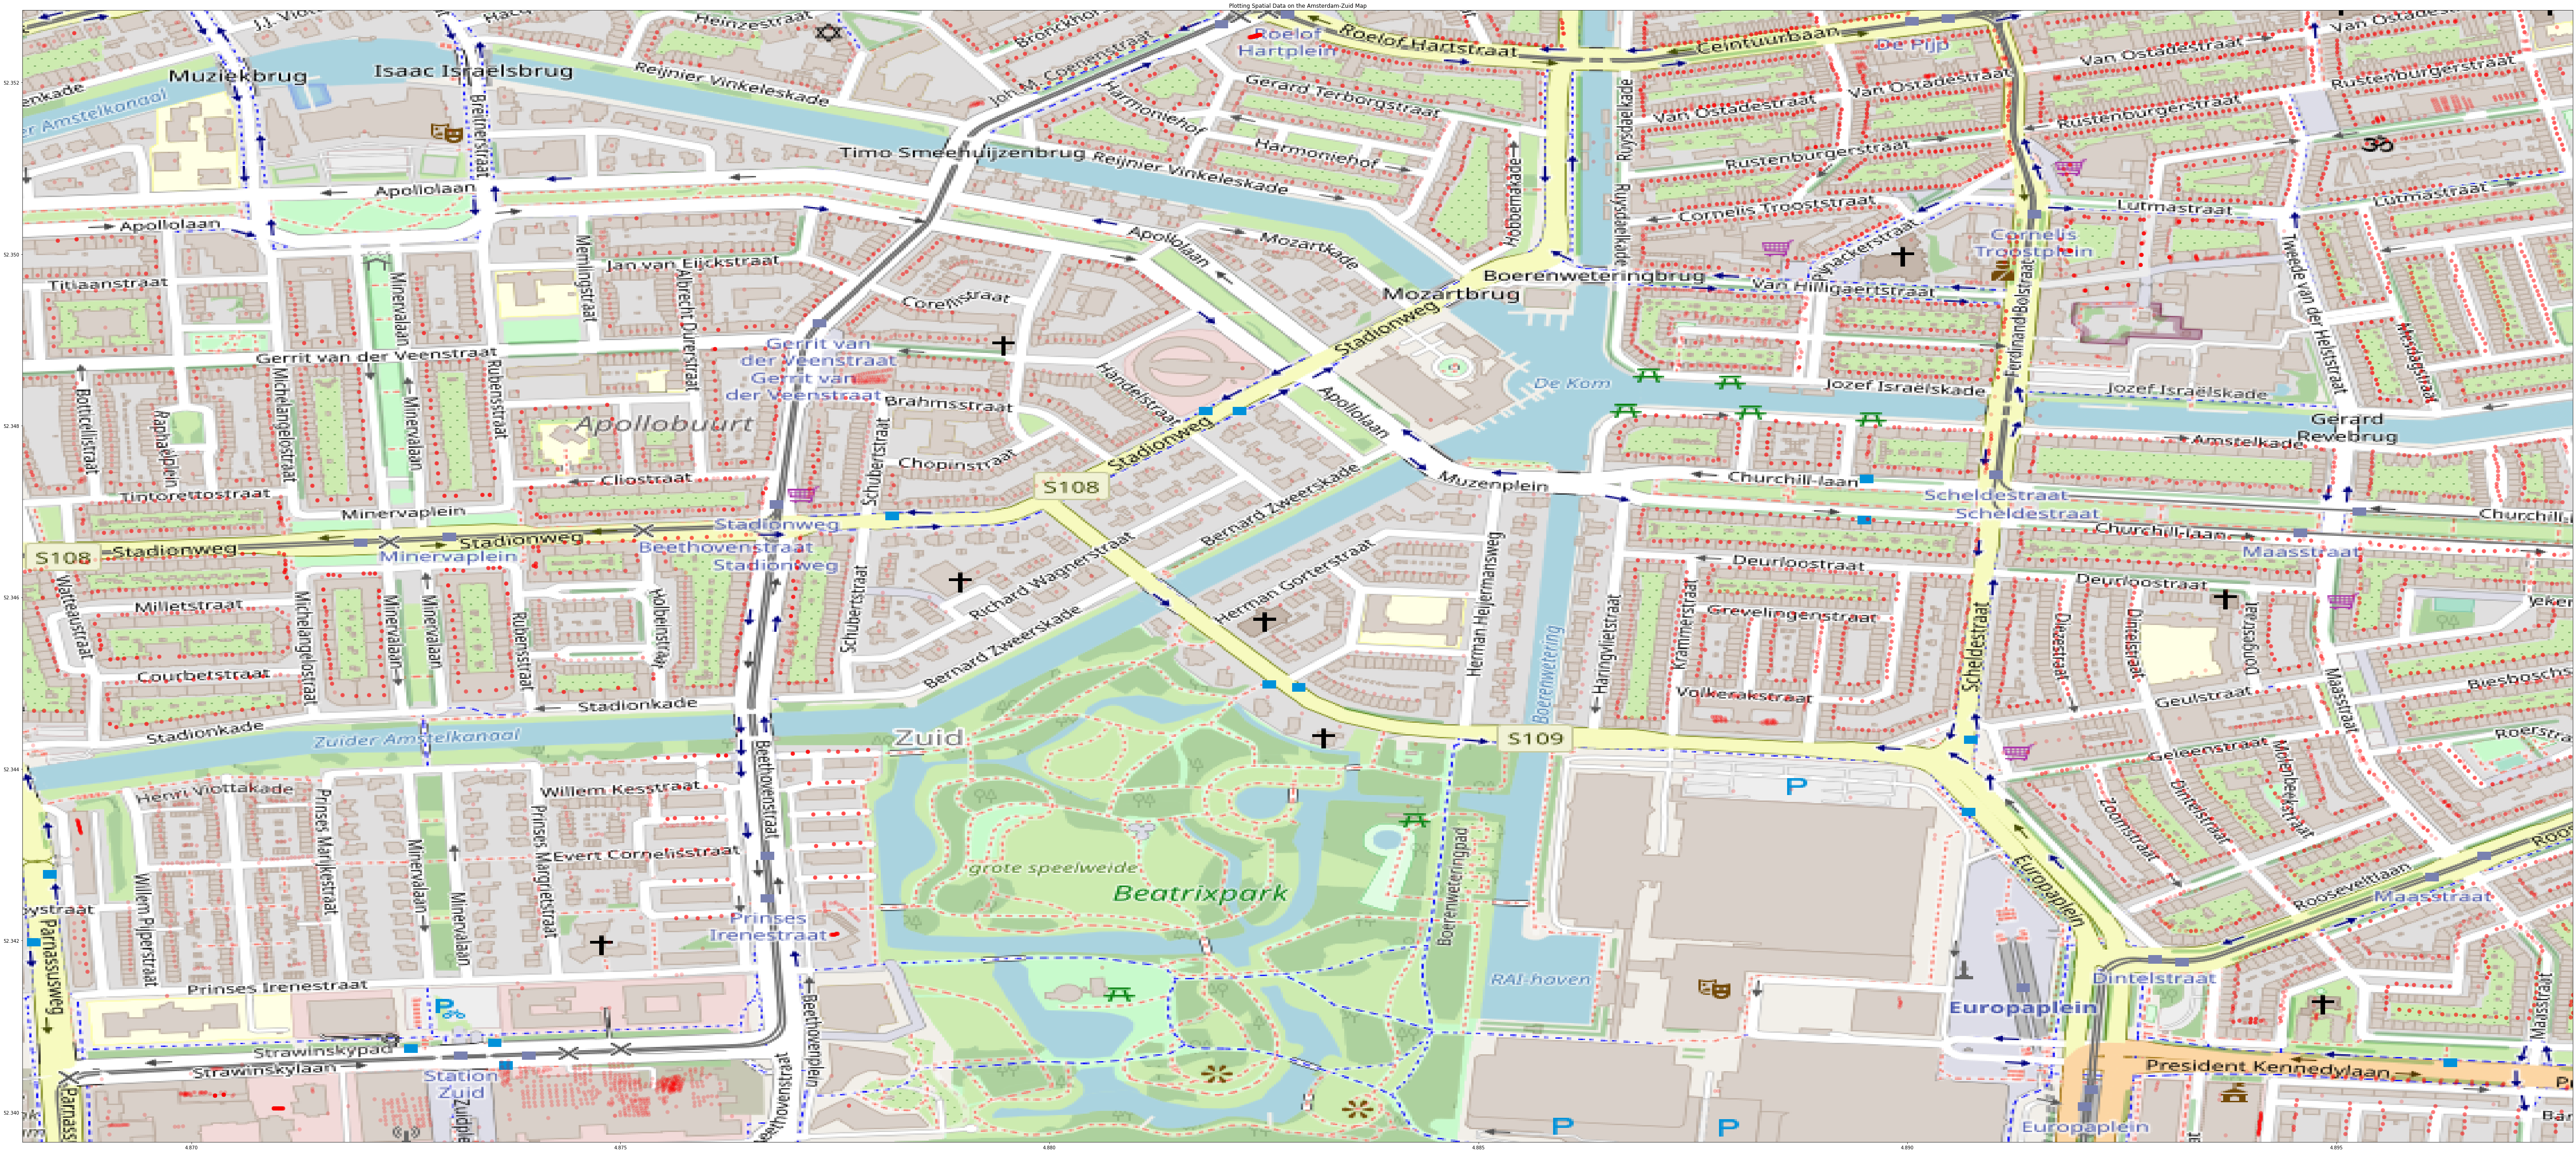

In [7]:
fig, ax = plt.subplots(figsize = (100, 90))
ax.scatter(df_kadaster.lon, df_kadaster.lat, zorder = 1, alpha = 0.2, c = 'r', s = 10, linewidths = 6)
ax.set_title('Plotting Spatial Data on the Amsterdam-Zuid Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(ams_z, zorder = 0, extent = BBox, aspect = 'equal')

In [8]:
# Load CSV from CBS (2020, https://www.cbs.nl/nl-nl/maatwerk/2020/33/energielevering-aan-woningen-en-bedrijven-naar-postcode)
df_energy = pd.read_csv('Publicatiefile_Energie_2020.csv', index_col = False, sep = ';')

# Clean up
df_energy = df_energy.rename(columns = {"Postcode6":"postcode", "Gemiddelde_aardgaslevering_woningen":"gem_gas_woning", 
                                        "Gemiddelde_aardgaslevering_woningen_gecorrigeerd": "gem_gas_woning_cor", 
                                       "Gemiddelde_aardgaslevering_bedrijven":"gem_gas_bedrijf", 
                                        'Gemiddelde_elektriciteitslevering_woningen':'gem_elektriciteit_woning', 
                                        'Gemiddelde_elektriciteitslevering_bedrijven':'gem_elektriciteit_bedrijf'})
df_energy = df_energy.replace('.', 0)
df_energy[["gem_gas_woning", "gem_gas_woning_cor", "gem_gas_bedrijf", 
           "gem_elektriciteit_woning", "gem_elektriciteit_bedrijf"]] = df_energy[["gem_gas_woning", "gem_gas_woning_cor", 
                                                                                  "gem_gas_bedrijf", "gem_elektriciteit_woning", 
                                                                                  "gem_elektriciteit_bedrijf"]].astype(str).astype(int)
df_energy

postcode  gem_gas_woning  gem_gas_woning_cor  gem_elektriciteit_woning  \
0        1011AB               0                   0                         0   
1        1011AC            1800                2090                      2880   
2        1011AD               0                   0                         0   
3        1011AE               0                   0                         0   
4        1011AG               0                   0                         0   
...         ...             ...                 ...                       ...   
457493   9999XG               0                   0                         0   
457494   9999XH               0                   0                         0   
457495   9999XJ            1970                2290                      3280   
457496   9999XK            1600                1860                      2270   
457497   9999XL            1780                2070                      3100   

        gem_gas_bedrijf  gem_elektriciteit_bedrijf  
0                  5930                      62110  
1                 10410                      68890  
2                     0                     971750  
3                     0                          0  
4                  4700                      32060  
...                 ...                        ...  
457493                0                          0  
457494                0                          0  
457495             1340                      13440  
457496                0                          0  
457497                0                          0  

[457498 rows x 6 columns]

In [9]:
df_env = pd.merge(df_kadaster, df_energy, on = 'postcode').drop(['Unnamed: 0'], axis = 1)
df_env 

openbareruimtenaam  huisnummer huisletter huisnummertoevoeging  \
0      Cornelis Schuytstraat          74        NaN                  NaN   
1          J.J. Viottastraat          41        NaN                  NaN   
2          J.J. Viottastraat          43        NaN                  NaN   
3          J.J. Viottastraat          47        NaN                  NaN   
4          J.J. Viottastraat          49        NaN                  NaN   
...                      ...         ...        ...                  ...   
17810             Veluwelaan           8        NaN                    2   
17811             Veluwelaan           8        NaN                    H   
17812             Veluwelaan          10        NaN                    1   
17813             Veluwelaan          10        NaN                    2   
17814             Veluwelaan          10        NaN                    H   

      postcode      buurtnaam   buurtcode        wijknaam  wijkcode  \
0       1071JL  Banpleinbuurt  BU03634704  Museumkwartier  WK036347   
1       1071JP  Banpleinbuurt  BU03634704  Museumkwartier  WK036347   
2       1071JP  Banpleinbuurt  BU03634704  Museumkwartier  WK036347   
3       1071JP  Banpleinbuurt  BU03634704  Museumkwartier  WK036347   
4       1071JP  Banpleinbuurt  BU03634704  Museumkwartier  WK036347   
...        ...            ...         ...             ...       ...   
17810   1079PZ    Veluwebuurt  BU03635206    Scheldebuurt  WK036352   
17811   1079PZ    Veluwebuurt  BU03635206    Scheldebuurt  WK036352   
17812   1079PZ    Veluwebuurt  BU03635206    Scheldebuurt  WK036352   
17813   1079PZ    Veluwebuurt  BU03635206    Scheldebuurt  WK036352   
17814   1079PZ    Veluwebuurt  BU03635206    Scheldebuurt  WK036352   

      woonplaats  ...  omtrek_pand  verhouding_opp_vbo_opp_pnd  \
0      Amsterdam  ...         70.0                        3.20   
1      Amsterdam  ...         11.0                        0.63   
2      Amsterdam  ...         86.0                        3.07   
3      Amsterdam  ...         72.0                        2.77   
4      Amsterdam  ...         72.0                        2.77   
...          ...  ...          ...                         ...   
17810  Amsterdam  ...         53.0                        2.44   
17811  Amsterdam  ...         53.0                        2.44   
17812  Amsterdam  ...         53.0                        2.44   
17813  Amsterdam  ...         53.0                        2.44   
17814  Amsterdam  ...         53.0                        2.44   

            pandstatus bouwjaar  potent_pand_asbest  gem_gas_woning  \
0      Pand in gebruik   1921.0                   0            1560   
1      Pand in gebruik   1993.0                   0            1920   
2      Pand in gebruik   1992.0                   0            1920   
3      Pand in gebruik   1993.0                   0            1920   
4      Pand in gebruik   1993.0                   0            1920   
...                ...      ...                 ...             ...   
17810  Pand in gebruik   1952.0                   0            1000   
17811  Pand in gebruik   1952.0                   0            1000   
17812  Pand in gebruik   1952.0                   0            1000   
17813  Pand in gebruik   1952.0                   0            1000   
17814  Pand in gebruik   1952.0                   0            1000   

       gem_gas_woning_cor  gem_elektriciteit_woning  gem_gas_bedrijf  \
0                    1810                      2940            20260   
1                    2230                      4590             6920   
2                    2230                      4590             6920   
3                    2230                      4590             6920   
4                    2230                      4590             6920   
...                   ...                       ...              ...   
17810                1160                      3240                0   
17811                1

In [10]:
def filter_by_freq(df: pd.DataFrame, column: str, min_freq: int) -> pd.DataFrame:
    """Filters df based on value frequency in specified column.
    
    Input: 
    df: dataframe to be filtered
    column: name column that should be frequency filtered
    min_freq: minimal value frequency for the row to be accepted
    
    Output:
    Frequency filtered dataframe
    
    """
    
    freq = df[column].value_counts()
    frequent_values = freq[freq >= min_freq].index
    return df[df[column].isin(frequent_values)]

In [11]:
df_env['gebouwen_gebruik_gas'] = ((df_env['gem_gas_woning_cor'] > 0) | (df_env['gem_gas_bedrijf'] > 0))
df_env['gebouwen_gebruik_gas'] = list(map(int, df_env['gebouwen_gebruik_gas']))

# 1 = building that uses gas and 0 = no gas usage
print(df_env['gebouwen_gebruik_gas'].value_counts())

1    16888
0      927
Name: gebouwen_gebruik_gas, dtype: int64


In [12]:
woon_post = df_env[df_env['woonfunctie'] == 1]
woon_post = filter_by_freq(woon_post, 'postcode', 10) # 10 zipcodes is arbitrarily set 

df_env['meer_reg_woning'] = (df_env['postcode'].eq(woon_post['postcode']))
df_env['meer_reg_woning'] = list(map(int, df_env['meer_reg_woning']))

# 1 = Multiple woonfuncties located on same zipcode (equal or above 10), 0 = Everything below 10 registrations
print(df_env['meer_reg_woning'].value_counts())

1    14848
0     2967
Name: meer_reg_woning, dtype: int64


In [13]:
indu_post = df_env[df_env['industriefunctie'] == 1]
indu_post = filter_by_freq(indu_post, 'postcode', 2) # 2 zipcodes is arbitrarily set 

df_env['meer_reg_industrie'] = (df_env['postcode'].eq(indu_post['postcode']))
df_env['meer_reg_industrie'] = list(map(int, df_env['meer_reg_industrie']))

# 1 = Multiple industriefuncties on same zipcode (equal or above 2), 0 = Everything below 1 registrations
print(df_env['meer_reg_industrie'].value_counts())

0    17779
1       36
Name: meer_reg_industrie, dtype: int64


In [14]:
df_env.dtypes

openbareruimtenaam               object
huisnummer                        int64
huisletter                       object
huisnummertoevoeging             object
postcode                         object
buurtnaam                        object
buurtcode                        object
wijknaam                         object
wijkcode                         object
woonplaats                       object
gemeentecode                      int64
nevenadres                        int64
typeadresseerbaarobject          object
adresseerbaarobject_status       object
opp_adresseerbaarobject_m2        int64
aantal_nad_per_adresobject        int64
adresseerbaarobject_id            int64
x                               float64
y                               float64
lon                             float64
lat                             float64
woonfunctie                     float64
bijeenkomstfunctie              float64
celfunctie                      float64
gezondheidszorgfunctie          float64


In [15]:
df_env = df_env[['buurtnaam', 'industriefunctie', 'sportfunctie', 'x', 'y', 'lon', 'lat', 
                 'gem_gas_woning', 'gem_gas_woning_cor', 'gem_elektriciteit_woning', 'gem_gas_bedrijf', 
                 'gem_elektriciteit_bedrijf', 'potent_pand_asbest', 'gebouwen_gebruik_gas', 'meer_reg_woning', 
                 'meer_reg_industrie']].rename(columns = {'industriefunctie':'industrie', 
                                                                                 'sportfunctie':'sport'})
df_env

buurtnaam  industrie  sport           x           y       lon  \
0      Banpleinbuurt        0.0    0.0  119950.000  485101.000  4.872752   
1      Banpleinbuurt        0.0    0.0  119864.993  485104.594  4.871504   
2      Banpleinbuurt        0.0    0.0  119853.000  485094.000  4.871329   
3      Banpleinbuurt        0.0    0.0  119822.456  485085.540  4.870881   
4      Banpleinbuurt        0.0    0.0  119819.221  485083.253  4.870834   
...              ...        ...    ...         ...         ...       ...   
17810    Veluwebuurt        0.0    0.0  121599.000  483662.000  4.897097   
17811    Veluwebuurt        0.0    0.0  121599.000  483662.000  4.897097   
17812    Veluwebuurt        0.0    0.0  121598.000  483652.000  4.897084   
17813    Veluwebuurt        0.0    0.0  121598.000  483652.000  4.897084   
17814    Veluwebuurt        0.0    0.0  121598.000  483652.000  4.897084   

             lat  gem_gas_woning  gem_gas_woning_cor  \
0      52.352693            1560                1810   
1      52.352720            1920                2230   
2      52.352624            1920                2230   
3      52.352546            1920                2230   
4      52.352525            1920                2230   
...          ...             ...                 ...   
17810  52.339863            1000                1160   
17811  52.339863            1000                1160   
17812  52.339773            1000                1160   
17813  52.339773            1000                1160   
17814  52.339773            1000                1160   

       gem_elektriciteit_woning  gem_gas_bedrijf  gem_elektriciteit_bedrijf  \
0                          2940            20260                      45800   
1                          4590             6920                      23450   
2                          4590             6920                      23450   
3                          4590             6920                      23450   
4                          4590             6920                      23450   
...                         ...              ...                        ...   
17810                      3240                0                          0   
17811                      3240                0                          0   
17812                      3240                0                          0   
17813                      3240                0                          0   
17814                      3240                0                          0   

       potent_pand_asbest  gebouwen_gebruik_gas  meer_reg_woning  \
0                       0                     1                0   
1                       0                     1                0   
2                       0                     1                0   
3                       0                     1                0   
4                       0                     1                0   
...                   ...                   ...              ...   
17810                   0                     1                1   
17811                   0                     1                1   
17812                   0                     1                1   
17813                   0                     1                1   
17814                   0                     1                1   

       meer_reg_industrie  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  
...                   ...  
17810                   0  
17811                   0  
17812                   0  
17813                   0  
17814                   0  

[17815 rows x 16 columns]

In [16]:
df_env = df_env.groupby(['buurtnaam'], as_index = False).agg({'industrie':'sum', 
                                                              'sport':'sum',
                                                              'x':'mean',
                                                              'y':'mean',
                                                              'lon':'mean',
                                                              'lat':'mean',
                                                              'gem_gas_woning':'mean',
                                                              'gem_gas_woning_cor':'mean',
                                                              'gem_elektriciteit_woning':'mean',
                                                              'gem_gas_bedrijf':'mean',
                                                              'gem_elektriciteit_bedrijf':'mean', 
                                                              'potent_pand_asbest':'sum', 
                                                              'gebouwen_gebruik_gas':'sum', 
                                                              'meer_reg_woning':'sum', 
                                                              'meer_reg_industrie':'sum'})
df_env

buurtnaam  industrie  sport              x  \
0                     Banpleinbuurt        0.0    1.0  120150.178815   
1                       Beatrixpark        0.0    0.0  120728.000000   
2                    Beethovenbuurt        3.0    2.0  120387.873223   
3   Burgemeester Tellegenbuurt West        1.0    0.0  121549.965914   
4              Cornelis Troostbuurt       29.0    1.0  121059.413659   
5                  Diepenbrockbuurt        1.0    1.0  120455.096941   
6                     Duivelseiland        0.0    0.0  120804.621278   
7                  Harmoniehofbuurt        1.0    0.0  120657.625788   
8             Hercules Seghersbuurt        0.0    0.0  121003.560398   
9                       Hiltonbuurt        0.0    1.0  119988.697000   
10                 Hondecoeterbuurt        5.0    1.0  120436.755685   
11                  IJselbuurt West        0.0    1.0  121574.531532   
12                       Kop Zuidas        0.0    0.0  121387.460746   
13               Lizzy Ansinghbuurt       17.0    1.0  121334.638143   
14              Minervabuurt Midden        2.0    1.0  119946.025388   
15               Minervabuurt Noord        1.0    0.0  119992.134512   
16                Minervabuurt Zuid        2.0    0.0  119888.988123   
17               Prinses Irenebuurt        2.0    0.0  120008.572535   
18                              RAI        0.0    5.0  121055.737952   
19                   Rijnbuurt West        0.0    0.0  121639.930233   
20              Scheldebuurt Midden        1.0    0.0  121565.093186   
21                Scheldebuurt West        2.0    0.0  121379.756114   
22               Valeriusbuurt Oost        0.0    0.0  119682.567975   
23          Van der Helstpleinbuurt        7.0    0.0  121545.614390   
24                      Veluwebuurt        1.0    0.0  121518.309783   
25                   Wielingenbuurt        0.0    1.0  121035.566394   
26                     Zuidas Noord        2.0    2.0  119980.791119   

                y       lon        lat  gem_gas_woning  gem_gas_woning_cor  \
0   485068.214975  4.875693  52.352411     1672.689076         1940.924370   
1   484161.000000  4.884266  52.344294     3140.000000         3650.000000   
2   484660.132091  4.879224  52.348759     1619.015625         1878.718750   
3   484774.945546  4.896267  52.349863      889.243924         1031.494149   
4   484873.431133  4.889058  52.350718      764.264456          886.802721   
5   484360.388977  4.880241  52.346069     1879.604520         2181.525424   
6   485080.351661  4.885297  52.352562      809.739130          944.173913   
7   484983.859846  4.883150  52.351685     1118.515284         1299.061135   
8   485084.991163  4.888217  52.352616      614.253394          710.723982   
9   484936.464500  4.873337  52.351217     1074.545455         1249.090909   
10  485061.358739  4.879900  52.352368     1049.014778         1217.044335   
11  484506.990991  4.896654  52.347456      855.135135          991.261261   
12  483669.484317  4.893993  52.339918      605.555556          699.206349   
13  484940.568332  4.893090  52.351338      806.240653          935.893950   
14  484548.438208  4.872751  52.347727     1608.600000         1867.617391   
15  484759.929906  4.873406  52.349631     1603.315603         1861.719858   
16  484321.402396  4.871938  52.345683     1506.554276         1749.654605   
17  484024.889278  4.873723  52.343026     1556.469816         1806.036745   
18  483919.521238  4.889100  52.342144      937.619048         1087.619048   
19  483878.046512  4.897676  52.341807      910.930233         1055.348837   
20  484229.454052  4.896543  52.344961     1112.734694         1291.959184   
21  484148.508804  4.893832  52.344222     1057.232626         1226.953808   
22  485060.883650  4.868831  52.352316      864.000000         1002.750000   
23  485031.845093  4.896178  52.352171      802.607945          933.713299   
24  483690.619565  4.895910  52.340116     1112.282609     

In [17]:
df_env[['gem_gas_woning', 'gem_gas_woning_cor', 
        'gem_elektriciteit_woning', 'gem_gas_bedrijf', 'gem_elektriciteit_bedrijf']] = df_env[['gem_gas_woning', 'gem_gas_woning_cor', 
        'gem_elektriciteit_woning', 'gem_gas_bedrijf', 'gem_elektriciteit_bedrijf']].round(0)
df_env

buurtnaam  industrie  sport              x  \
0                     Banpleinbuurt        0.0    1.0  120150.178815   
1                       Beatrixpark        0.0    0.0  120728.000000   
2                    Beethovenbuurt        3.0    2.0  120387.873223   
3   Burgemeester Tellegenbuurt West        1.0    0.0  121549.965914   
4              Cornelis Troostbuurt       29.0    1.0  121059.413659   
5                  Diepenbrockbuurt        1.0    1.0  120455.096941   
6                     Duivelseiland        0.0    0.0  120804.621278   
7                  Harmoniehofbuurt        1.0    0.0  120657.625788   
8             Hercules Seghersbuurt        0.0    0.0  121003.560398   
9                       Hiltonbuurt        0.0    1.0  119988.697000   
10                 Hondecoeterbuurt        5.0    1.0  120436.755685   
11                  IJselbuurt West        0.0    1.0  121574.531532   
12                       Kop Zuidas        0.0    0.0  121387.460746   
13               Lizzy Ansinghbuurt       17.0    1.0  121334.638143   
14              Minervabuurt Midden        2.0    1.0  119946.025388   
15               Minervabuurt Noord        1.0    0.0  119992.134512   
16                Minervabuurt Zuid        2.0    0.0  119888.988123   
17               Prinses Irenebuurt        2.0    0.0  120008.572535   
18                              RAI        0.0    5.0  121055.737952   
19                   Rijnbuurt West        0.0    0.0  121639.930233   
20              Scheldebuurt Midden        1.0    0.0  121565.093186   
21                Scheldebuurt West        2.0    0.0  121379.756114   
22               Valeriusbuurt Oost        0.0    0.0  119682.567975   
23          Van der Helstpleinbuurt        7.0    0.0  121545.614390   
24                      Veluwebuurt        1.0    0.0  121518.309783   
25                   Wielingenbuurt        0.0    1.0  121035.566394   
26                     Zuidas Noord        2.0    2.0  119980.791119   

                y       lon        lat  gem_gas_woning  gem_gas_woning_cor  \
0   485068.214975  4.875693  52.352411          1673.0              1941.0   
1   484161.000000  4.884266  52.344294          3140.0              3650.0   
2   484660.132091  4.879224  52.348759          1619.0              1879.0   
3   484774.945546  4.896267  52.349863           889.0              1031.0   
4   484873.431133  4.889058  52.350718           764.0               887.0   
5   484360.388977  4.880241  52.346069          1880.0              2182.0   
6   485080.351661  4.885297  52.352562           810.0               944.0   
7   484983.859846  4.883150  52.351685          1119.0              1299.0   
8   485084.991163  4.888217  52.352616           614.0               711.0   
9   484936.464500  4.873337  52.351217          1075.0              1249.0   
10  485061.358739  4.879900  52.352368          1049.0              1217.0   
11  484506.990991  4.896654  52.347456           855.0               991.0   
12  483669.484317  4.893993  52.339918           606.0               699.0   
13  484940.568332  4.893090  52.351338           806.0               936.0   
14  484548.438208  4.872751  52.347727          1609.0              1868.0   
15  484759.929906  4.873406  52.349631          1603.0              1862.0   
16  484321.402396  4.871938  52.345683          1507.0              1750.0   
17  484024.889278  4.873723  52.343026          1556.0              1806.0   
18  483919.521238  4.889100  52.342144           938.0              1088.0   
19  483878.046512  4.897676  52.341807           911.0              1055.0   
20  484229.454052  4.896543  52.344961          1113.0              1292.0   
21  484148.508804  4.893832  52.344222          1057.0              1227.0   
22  485060.883650  4.868831  52.352316           864.0              1003.0   
23  485031.845093  4.896178  52.352171           803.0               934.0   
24  483690.619565  4.895910  52.340116          1112.0     

In [18]:
df_env.dtypes

buurtnaam                     object
industrie                    float64
sport                        float64
x                            float64
y                            float64
lon                          float64
lat                          float64
gem_gas_woning               float64
gem_gas_woning_cor           float64
gem_elektriciteit_woning     float64
gem_gas_bedrijf              float64
gem_elektriciteit_bedrijf    float64
potent_pand_asbest             int64
gebouwen_gebruik_gas           int64
meer_reg_woning                int64
meer_reg_industrie             int64
dtype: object

$CO^2$ will be released when a fire occurs at buildings that uses gasses, so the environmental effect would be higher when that effect occurs. 

According to Martin, Tomida, and Meacham (2016, https://firesciencereviews.springeropen.com/articles/10.1186/s40038-016-0014-1), a combination of industrial buildings and gas usage, the environmental effects would be higher in comparison to the normal residential ones. It could also affect the waters when an industrial building is located near waters (release/leakage of chemicals). 

According to the fire deparment in the Netherlands (https://www.ifv.nl/kennisplein/Documents/20210321-BA-Jaaroverzicht-fatale-woningbranden-2020.pdf), the most common fires in the Netherlands (2020) were caused by equipment failure, smoking, cooking, playing with fire, and candles. 35% of them were classified as unknown, assuming that it is caused by people who have started a fire.  

We are only focusing on the air effect when a fire occurs, since the effect of ground is more applicable for the infrastructure effect, while the effect on water depends if there is an industry is located near the water. When that will result in a fire, then it will be leaking any chemicals in the water, but that is not the case in Amsterdam-Zuid. It becomes important when we are calculating the environmental effect in industrial areas which are located near waters, for example the industrial areas of Sloterdijk. 

*High gas usage* <br>
According to the CBS (2021, https://www.cbs.nl/nl-nl/cijfers/detail/81528NED), within Amsterdam, the average household uses 770 m3 of gas. When considering everything that is higher than 75% of 770 m3 (> 1155 m3), that is what we will classify as high usage neighborhoods. For the companies, it is unknown how much it is used, so the average of the CSV is used, which is 5090 m3. So 75% is equal to 7635 m3. 

*High asbest neighborhood* <br>
According to BAG data, there are 102.192 buildings build between 1950 and 1980. According to the information of the government (https://www.infomil.nl/onderwerpen/asbest/asbest-in-panden/), most houses between 1955 and 1978 contain a high amount of asbestos (https://www.infomil.nl/publish/pages/118796/rapport_asbest_in_kaart_tcm24-187269.pdf). So these buildings can be dangerous for the environment and for the people when a fire occurs. Asbestos was mostly applied in big buildings (flats, industrial areas, etc.). 

*Neighborhoods with more than one areas located on the same location (based on zipcode)* <br> 
Properties that are located near or at the same location that will contain fire while containing or uses gas could cause a high effect on a local level. Fumes of these fires could be dangerous for the environment and people in the neighborhood. 

*Neighborhoods with one or multiple industries* <br> 
When an industry has one (regional effect) or more than one industries (national effect when that catches fire) located that are working with (dangerous) chemicals, that can be dangerous for the environment in this case when a fire occurs. 

**Environmental Effects categorisation on neighborhood level** (based on the features that we have and literature) 
* *No/slight effect* (0-1): all buildings - high gas usage +/- year of build (homes build outside 1955-1978)
* *Minor effect* (2): all buildings (except for multiple homes/industrial buildings registered on same postcode) + high gas usage +/- year of build (homes build outside 1955-1978) 
* *Local effect* (3): multiple woonfuncties located on the same zipcode + high gas usage + year of build (homes build between 1955-1978)
* *Regional effect* (4): industrial buildings + high gas usage + year of build (buildings build between 1955-1978) 
* *National effect* (5): multiple industrial buildings located on the same zipcode + high gas usage + year of build (buildings build between 1955-1978) 

In [19]:
# It seems like that Amsterdam-Zuid is slightly on the higher side regarding gas usage
df_env.describe()

industrie      sport              x              y        lon  \
count  27.000000  27.000000      27.000000      27.000000  27.000000   
mean    2.851852   0.666667  120768.796549  484513.279116   4.884829   
std     6.261627   1.074172     649.857859     485.701835   0.009548   
min     0.000000   0.000000  119682.567975  483669.484317   4.868831   
25%     0.000000   0.000000  120079.375675  484154.754402   4.874708   
50%     1.000000   0.000000  120804.621278  484548.438208   4.885297   
75%     2.000000   1.000000  121383.608430  484962.214089   4.893912   
max    29.000000   5.000000  121639.930233  485084.991163   4.897676   

             lat  gem_gas_woning  gem_gas_woning_cor  \
count  27.000000       27.000000           27.000000   
mean   52.347463     1152.444444         1337.777778   
std     0.004357      570.637318          663.277430   
min    52.339918        2.000000            2.000000   
25%    52.344258      832.500000          967.500000   
50%    52.347727     1057.000000         1227.000000   
75%    52.351512     1531.500000         1778.000000   
max    52.352616     3140.000000         3650.000000   

       gem_elektriciteit_woning  gem_gas_bedrijf  gem_elektriciteit_bedrijf  \
count                 27.000000        27.000000                  27.000000   
mean                2413.148148       775.814815                6865.888889   
std                 1022.574906      1636.008041                9826.669501   
min                    3.000000         0.000000                   0.000000   
25%                 1764.500000         0.000000                1127.500000   
50%                 2160.000000       151.000000                3894.000000   
75%                 3185.500000       494.500000                6115.000000   
max                 5460.000000      6310.000000               36450.000000   

       potent_pand_asbest  gebouwen_gebruik_gas  meer_reg_woning  \
count           27.000000             27.000000        27.000000   
mean            35.370370            625.481481       549.925926   
std            107.748335            687.278153       655.396822   
min              0.000000              1.000000         0.000000   
25%              0.000000             87.000000        72.500000   
50%              0.000000            337.000000       204.000000   
75%              7.500000           1013.500000       909.500000   
max            522.000000           2403.000000      2281.000000   

       meer_reg_industrie  
count           27.000000  
mean             1.333333  
std              3.540969  
min              0.000000  
25%              0.000000  
50%              0.000000  
75%              0.000000  
max             17.000000

In [20]:
df_env['hoge_gas_verbruik'] = ((df_env['gem_gas_woning_cor'] >= 1155) | (df_env['gem_gas_bedrijf'] >= 7635))
df_env['hoge_gas_verbruik'] = list(map(int, df_env['hoge_gas_verbruik']))

# 1 = high gas usage and 0 = mediocre gas usage
print(df_env['hoge_gas_verbruik'].value_counts())

1    15
0    12
Name: hoge_gas_verbruik, dtype: int64


In [21]:
df_env['hoge_asbest_buurt'] = ((df_env['potent_pand_asbest'] >= 10)) # Arbitrarily set on 10 
df_env['hoge_asbest_buurt'] = list(map(int, df_env['hoge_asbest_buurt']))

# 1 = high gas usage and 0 = mediocre gas usage
print(df_env['hoge_asbest_buurt'].value_counts())

0    22
1     5
Name: hoge_asbest_buurt, dtype: int64


In [22]:
df_env['hoge_dichtheid_buurt'] = ((df_env['meer_reg_woning'] >= 1000)) # Arbitrarily set on 1000
df_env['hoge_dichtheid_buurt'] = list(map(int, df_env['hoge_dichtheid_buurt']))

# 1 = high density areas and 0 = low or no density areas
print(df_env['hoge_dichtheid_buurt'].value_counts())

0    21
1     6
Name: hoge_dichtheid_buurt, dtype: int64


In [23]:
df_env['industrie_buurt'] = ((df_env['meer_reg_industrie'] >= 1)) 
df_env['industrie_buurt'] = list(map(int, df_env['industrie_buurt']))

# 1 = neighborhood has industry and 0 = no industry located
print(df_env['industrie_buurt'].value_counts())

0    21
1     6
Name: industrie_buurt, dtype: int64


In [24]:
df_env['industriegebied'] = ((df_env['meer_reg_industrie'] >= 2)) # Arbitrarily set on 2
df_env['industriegebied'] = list(map(int, df_env['industriegebied']))

# 1 = neighborhood has more industries located and 0 = less than 2 industries located on zipcode level
print(df_env['industriegebied'].value_counts())

0    21
1     6
Name: industriegebied, dtype: int64


In [25]:
df_env['env_effect'] = df_env['hoge_gas_verbruik'] + df_env['hoge_asbest_buurt'] + df_env['hoge_dichtheid_buurt'] + df_env['industrie_buurt'] + df_env['industriegebied']
df_env

buurtnaam  industrie  sport              x  \
0                     Banpleinbuurt        0.0    1.0  120150.178815   
1                       Beatrixpark        0.0    0.0  120728.000000   
2                    Beethovenbuurt        3.0    2.0  120387.873223   
3   Burgemeester Tellegenbuurt West        1.0    0.0  121549.965914   
4              Cornelis Troostbuurt       29.0    1.0  121059.413659   
5                  Diepenbrockbuurt        1.0    1.0  120455.096941   
6                     Duivelseiland        0.0    0.0  120804.621278   
7                  Harmoniehofbuurt        1.0    0.0  120657.625788   
8             Hercules Seghersbuurt        0.0    0.0  121003.560398   
9                       Hiltonbuurt        0.0    1.0  119988.697000   
10                 Hondecoeterbuurt        5.0    1.0  120436.755685   
11                  IJselbuurt West        0.0    1.0  121574.531532   
12                       Kop Zuidas        0.0    0.0  121387.460746   
13               Lizzy Ansinghbuurt       17.0    1.0  121334.638143   
14              Minervabuurt Midden        2.0    1.0  119946.025388   
15               Minervabuurt Noord        1.0    0.0  119992.134512   
16                Minervabuurt Zuid        2.0    0.0  119888.988123   
17               Prinses Irenebuurt        2.0    0.0  120008.572535   
18                              RAI        0.0    5.0  121055.737952   
19                   Rijnbuurt West        0.0    0.0  121639.930233   
20              Scheldebuurt Midden        1.0    0.0  121565.093186   
21                Scheldebuurt West        2.0    0.0  121379.756114   
22               Valeriusbuurt Oost        0.0    0.0  119682.567975   
23          Van der Helstpleinbuurt        7.0    0.0  121545.614390   
24                      Veluwebuurt        1.0    0.0  121518.309783   
25                   Wielingenbuurt        0.0    1.0  121035.566394   
26                     Zuidas Noord        2.0    2.0  119980.791119   

                y       lon        lat  gem_gas_woning  gem_gas_woning_cor  \
0   485068.214975  4.875693  52.352411          1673.0              1941.0   
1   484161.000000  4.884266  52.344294          3140.0              3650.0   
2   484660.132091  4.879224  52.348759          1619.0              1879.0   
3   484774.945546  4.896267  52.349863           889.0              1031.0   
4   484873.431133  4.889058  52.350718           764.0               887.0   
5   484360.388977  4.880241  52.346069          1880.0              2182.0   
6   485080.351661  4.885297  52.352562           810.0               944.0   
7   484983.859846  4.883150  52.351685          1119.0              1299.0   
8   485084.991163  4.888217  52.352616           614.0               711.0   
9   484936.464500  4.873337  52.351217          1075.0              1249.0   
10  485061.358739  4.879900  52.352368          1049.0              1217.0   
11  484506.990991  4.896654  52.347456           855.0               991.0   
12  483669.484317  4.893993  52.339918           606.0               699.0   
13  484940.568332  4.893090  52.351338           806.0               936.0   
14  484548.438208  4.872751  52.347727          1609.0              1868.0   
15  484759.929906  4.873406  52.349631          1603.0              1862.0   
16  484321.402396  4.871938  52.345683          1507.0              1750.0   
17  484024.889278  4.873723  52.343026          1556.0              1806.0   
18  483919.521238  4.889100  52.342144           938.0              1088.0   
19  483878.046512  4.897676  52.341807           911.0              1055.0   
20  484229.454052  4.896543  52.344961          1113.0              1292.0   
21  484148.508804  4.893832  52.344222          1057.0              1227.0   
22  485060.883650  4.868831  52.352316           864.0              1003.0   
23  485031.845093  4.896178  52.352171           803.0               934.0   
24  483690.619565  4.895910  52.340116          1112.0     

In [26]:
print(df_env['env_effect'].value_counts().sort_index())

0    7
1    8
2    6
3    6
Name: env_effect, dtype: int64


In [27]:
df_env.to_csv('environment_effect_set.csv')